In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from math import sqrt

In [11]:
df = pd.DataFrame(columns=['Customer Number','X Coord','Y Coord','Demand', 'Ready Time', 'Due Time', 'Service Time','Vehicle Number','Vehicle Capacity'])
df.head()

,Customer Number,X Coord,Y Coord,Demand,Ready Time,Due Time,Service Time,Vehicle Number,Vehicle Capacity


In [23]:
cust_num = 0
text_file = 'Data\\c102.txt'
with open(text_file, 'rt', newline='') as fo:
    for line_count, line in enumerate(fo, start=1):
        if line_count == 5:
            values = line.strip().split()
            vehicle_number = float(values[0])
            vehicle_capacity = float(values[1])
        if line_count >= 10:
            values = line.strip().split()
            df.loc[cust_num] = [float(values[0]),float(values[1]),float(values[2]),float(values[3]),float(values[4]),float(values[5]),float(values[6]),vehicle_number,vehicle_capacity]
            cust_num += 1
        else:
            pass

In [24]:
df.head(20)

,Customer Number,X Coord,Y Coord,Demand,Ready Time,Due Time,Service Time,Vehicle Number,Vehicle Capacity
0,0.0,40.0,50.0,0.0,0.0,1236.0,0.0,25.0,200.0
1,1.0,45.0,68.0,10.0,0.0,1127.0,90.0,25.0,200.0
2,2.0,45.0,70.0,30.0,0.0,1125.0,90.0,25.0,200.0
3,3.0,42.0,66.0,10.0,0.0,1129.0,90.0,25.0,200.0
4,4.0,42.0,68.0,10.0,727.0,782.0,90.0,25.0,200.0
5,5.0,42.0,65.0,10.0,0.0,1130.0,90.0,25.0,200.0
6,6.0,40.0,69.0,20.0,621.0,702.0,90.0,25.0,200.0
7,7.0,40.0,66.0,20.0,0.0,1130.0,90.0,25.0,200.0
8,8.0,38.0,68.0,20.0,255.0,324.0,90.0,25.0,200.0
9,9.0,38.0,70.0,10.0,534.0,605.0,90.0,25.0,200.0


In [45]:
print(len(df))

101


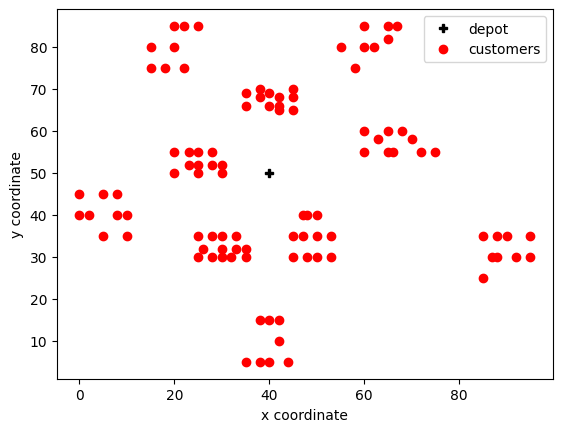

In [25]:
customer_number = 100

dep, = plt.plot(df.loc[0,'X Coord'], df.loc[0,'Y Coord'], 'kP', label='depot')
for customer_id in range(1,customer_number):
    custs, = plt.plot(df.loc[customer_id,'X Coord'], df.loc[customer_id,'Y Coord'], 'ro', label='customers')

plt.ylabel("y coordinate")
plt.xlabel("x coordinate")
plt.legend([dep, custs], ['depot', 'customers'], loc=1)
plt.show()

## PSO

In [26]:
def Ecl_distance(p1, p2):
    return sqrt((p1.loc['X Coord']-p2.loc['X Coord'])**2+(p1.loc['Y Coord']-p2.loc['Y Coord'])**2)

In [27]:
test1=df.loc[1]
test2=df.loc[2]
print(Ecl_distance(test1,test2))

2.0


In [78]:
def create_route_from_ind(data, individual):
    route = []
    subroute = []
    set_capacity = data.loc[1,'Vehicle Capacity']
    vehicle_load = 0
    previous_cust_id = 0
    elapsed_time = 0
    depot_due_time = data.loc[0,'Due Time']

    customer_indx = list(range(1, 100))  # Exclude depot (0)
    sorted_indx = sorted(customer_indx, key=lambda i: individual[i-1], reverse=True)

    for cust_id in sorted_indx:
        demand = data.loc[cust_id,'Demand']
        updated_vehicle_load = vehicle_load + demand

        service_time = data.loc[cust_id,'Service Time']
        moving_time = Ecl_distance(data.loc[cust_id],data.loc[previous_cust_id])
        return_time = Ecl_distance(data.loc[cust_id],data.loc[0])
        updated_elapsed_time = elapsed_time + service_time + moving_time + return_time

        if(updated_vehicle_load <= set_capacity) and (updated_elapsed_time <= depot_due_time):
            subroute.append(cust_id)
            vehicle_load = updated_vehicle_load
            elapsed_time = updated_elapsed_time - return_time
        else:
            route.append(subroute)
            subroute = [cust_id]
            vehicle_load = demand
            moving_time = Ecl_distance(data.loc[cust_id],data.loc[0])
            elapsed_time = service_time + moving_time
        previos_cust_id = cust_id
    if(subroute):
        route.append(subroute)
    
    return route

In [79]:
test_route = [87, 38, 7, 88, 70, 35, 98, 59, 47, 45, 32, 65, 15, 75, 4, 76, 62, 55, 50, 22, 21, 41, 85, 12, 63, 10, 5, 25, 79, 99, 33, 29, 2, 81, 73, 72, 90, 37, 24, 46, 27, 28, 93, 67, 96, 20, 11, 49, 78, 80, 14, 39, 97, 30, 91, 86, 17, 19, 82, 83, 26, 68, 89, 74, 1, 48, 77, 56, 57, 8, 9, 53, 18, 66, 34, 71, 23, 58, 43, 51, 36, 3, 94, 31, 16, 6, 95, 69, 61, 92, 44, 52, 60, 54, 64, 13, 84, 40, 42]
solution = create_route_from_ind(df, test_route)
print(solution)
print(len(solution))

[[30, 7, 53, 45, 87, 83, 43, 90, 55, 37], [63, 4, 1, 56, 23, 97, 60, 59, 34, 50], [29, 49, 67, 16, 14, 64, 35, 36, 76, 5], [88, 62, 44, 74, 12, 95, 25], [17, 89, 93, 8, 78, 69, 68, 18, 94, 72], [92, 80, 19, 48, 66, 9, 40, 10, 91], [79, 99, 22, 98, 52, 2, 38, 81, 6, 75], [31, 11, 84, 54, 32, 42, 41, 61, 28, 39], [77, 20, 21, 46, 58, 73, 57, 85], [13, 51, 96, 24, 47, 26, 71, 70, 3, 86], [27, 15, 82, 33, 65]]
11


In [80]:
def calculate_fitness(data, individual):

    transport_cost = 1.0  # cost of moving 1 vehicle for 1 unit
    vehicle_setup_cost = 1.0  # cost of adapting new vehicle
    wait_penalty = 0  # penalty for arriving too early
    delay_penalty = 3.0  # penalty for arriving too late

    route = create_route_from_ind(data, individual)
    total_cost = 999999
    fitness = 0
    max_vehicles_count = 25

    # checking if we have enough vehicles
    if len(route) <= max_vehicles_count:
        total_cost = 0
        for sub_route in route:
            sub_route_time_cost = 0
            sub_route_distance = 0
            elapsed_time = 0
            previous_cust_id = 0
            for cust_id in sub_route:
                # Calculate section distance
                distance = Ecl_distance(data.loc[cust_id],data.loc[previous_cust_id])
                # Update sub-route distance
                sub_route_distance = sub_route_distance + distance

                # Calculate time cost
                arrival_time = elapsed_time + distance

                waiting_time = max(data.loc[cust_id, 'Ready Time'] - arrival_time, 0)
                delay_time = max(arrival_time - data.loc[cust_id, 'Due Time'], 0)
                time_cost = wait_penalty * waiting_time + delay_penalty * delay_time

                # Update sub-route time cost
                sub_route_time_cost += time_cost

                # Update elapsed time
                service_time = data.loc[cust_id, 'Service Time']
                elapsed_time = arrival_time + service_time

                # Update last customer ID
                previous_cust_id = cust_id

            # Calculate transport cost
            distance_depot = Ecl_distance(data.loc[previous_cust_id],data.loc[0])
            sub_route_distance += distance_depot
            sub_route_transport_cost = vehicle_setup_cost + transport_cost * sub_route_distance
            # Obtain sub-route cost
            sub_route_cost = sub_route_time_cost + sub_route_transport_cost
            # Update total cost`
            total_cost += sub_route_cost

        # fitness = - math.log(1.0 / total_cost)
        fitness = total_cost

    return fitness

In [44]:
fit = calculate_fitness(df, test_route)
print(fit)

58459.02141571525


In [81]:
class Particle:
    def __init__(self, data, num_dimension):
        self.position = []
        self.velocity = []
        self.pbest_position = self.position
        self.pbest_fitness = -1
        self.p_fitness = -1
        self.data = data
    
        for i in range(0, num_dimension):
            self.position.append(random.uniform(-5,5))
            self.velocity.append(random.uniform(-1,1))
    
    def evaluate(self):
        self.p_fitness = calculate_fitness(self.data, self.position)
        if self.pbest_fitness == -1 or self.pbest_fitness < self.p_fitness:
            self.pbest_fitness = self.p_fitness
            self.pbest_position = self.position.copy()
    
    def update_velocity(self, num_dimensions, gbest_position):
        w = 0.9
        c1 = 2
        c2 = 2

        for i in range (0, num_dimensions):
            r1 = random.uniform(0,1)
            r2 = random.uniform(0,1)
            v_cognitive = c1*r1*(self.pbest_position[i] - self.position[i])
            v_social = c2*r2*(gbest_position[i] - self.position[i])
            self.velocity[i] = w*self.velocity[i] + v_cognitive + v_social

    def update_position(self, num_dimensions):
        for i in range (0, num_dimensions):
            self.position[i] = self.position[i] + self.velocity[i] 
            
    def print(self):
        print(self.position, '', self.velocity)


In [82]:
class PSO():
    def __init__(self, data, num_dimensions, num_particles, max_iter):
        num_dimensions = num_dimensions
        gbest_fitness = -1
        gbest_position = []

        swarm = []
        for i in range(0,num_particles):
            swarm.append(Particle(data, num_dimensions))
        
        for i in range(max_iter):
            for j in range(0, num_particles):
                swarm[j].evaluate()
                if swarm[j].p_fitness < gbest_fitness or gbest_fitness == -1:
                    gbest_position = list(swarm[j].position)
                    gbest_fitness = float(swarm[j].pbest_fitness)

            for j in range(0, num_particles):
                swarm[j].update_velocity(num_dimensions, gbest_position)
                swarm[j].update_position(num_dimensions)
            i += 1
        
        print('FINAL:')
        print(gbest_position)
        print(gbest_fitness)
        print()

In [83]:
PSO(data = df, num_dimensions = 100, num_particles=25, max_iter=200)

FINAL:
[-926.5789740620617, 6.084789670233362, 1932.8449663303481, 49738.59069124637, 26322.81443005133, 89.82517098367018, 15786.167955050203, 275.7554942218881, 2832.9095231952356, 3728869.457952911, 6971.14479401871, -15020.513749957605, 884987.1689621557, 3275744.229941212, -357.81474769714725, 35.87839970634832, 46269.99069020048, 77558.74164507509, -101.72059238216866, -1464531.8574802969, 13283.020635017925, 3209.9956332273878, 10185.555528307197, -33530.47303022643, -424717.3110580358, 607.1005555667233, 1559.2160555923274, -1398.2788699351013, -547.4293813497954, -225245.12956433021, 178806.15096896622, -2.066851197576953, -58.051352361490345, 4489.946308540164, -6160.266642706942, 258777.43172860693, -36.62824453164838, -511820.7493982705, 2343.1745856930347, -11545.7666284958, 4.842622885033762, -11073.858739398123, 1557.8006002050606, 323.55445859938663, -1073.035067618557, -0.367914990257006, 185.8212651579447, -9942.330601324767, -23943991.555155396, -38.20605079541121, -

In [ ]:
pos =[-926.5789740620617, 6.084789670233362, 1932.8449663303481, 49738.59069124637, 26322.81443005133, 89.82517098367018, 15786.167955050203, 275.7554942218881, 2832.9095231952356, 3728869.457952911, 6971.14479401871, -15020.513749957605, 884987.1689621557, 3275744.229941212, -357.81474769714725, 35.87839970634832, 46269.99069020048, 77558.74164507509, -101.72059238216866, -1464531.8574802969, 13283.020635017925, 3209.9956332273878, 10185.555528307197, -33530.47303022643, -424717.3110580358, 607.1005555667233, 1559.2160555923274, -1398.2788699351013, -547.4293813497954, -225245.12956433021, 178806.15096896622, -2.066851197576953, -58.051352361490345, 4489.946308540164, -6160.266642706942, 258777.43172860693, -36.62824453164838, -511820.7493982705, 2343.1745856930347, -11545.7666284958, 4.842622885033762, -11073.858739398123, 1557.8006002050606, 323.55445859938663, -1073.035067618557, -0.367914990257006, 185.8212651579447, -9942.330601324767, -23943991.555155396, -38.20605079541121, -159826.921294405, -1473604.7110647927, -74973.83044454832, 549.1195828551927, 699.9606495262173, 31.972044008052634, 1667.0378887103961, -234173.99436038407, 162629.29168952745, 79.89765738828567, -787.0704038672015, -1332.8888195578033, -3085855.834918583, -129.1473113976133, 234.6160929199247, -114.50049334795916, -16337.91273631809, 628.8435638487764, -3958.0794569364175, 253.6931941775694, 14529876.05888817, 79.80902233490293, -171.450370845119, 2257616.843454642, -31769.477083088103, -912.3187924962385, -5980.898098957172, 9802.939036115444, 3208.877225506671, -246.357180437519, 646.3095376680631, 754878.3654073164, 1301.8508277925384, 1582.369267192821, 3982.59874950604, -3415.689020637969, 57169.730260710654, -14599.739716022761, -2848557.4630874796, 984714.1211970611, 3464563.388941233, 4558.8804258805685, -3284.0725295612738, 133.20976744604252, -51917.8184750259, 1634.0608145868318, 6954.696900598838, 11197.002390168735, -4454.4731783820735, 134.17276630559763]
customer_indx = list(range(1, 100))  # Exclude depot (0)
sorted_indx = sorted(customer_indx, key=lambda i: pos[i-1], reverse=True)

print(customer_indx)
print(sorted_indx)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[71, 10, 91, 14, 74, 90, 13, 82, 36, 31, 59, 18, 87, 4, 17, 5, 7, 21, 98, 23, 78, 11, 97, 92, 34, 85, 22, 79, 9, 39, 3, 57, 96, 84, 27, 43, 83, 55, 81, 68, 26, 54, 44, 8, 70, 65, 47, 94, 6, 60, 72, 16, 56, 2, 41, 46, 32, 37, 50, 33, 19, 66, 64, 73, 80, 15, 29, 61, 76, 1, 45, 62, 28, 93, 86, 69, 99, 77, 35, 48, 42, 40, 88, 12, 67, 75, 24, 95, 53, 51, 30, 58, 25, 38, 20, 52, 89, 63, 49]


In [85]:
create_route_from_ind(df, sorted_indx)

[[77, 19, 23, 33, 88, 48, 74, 24, 3, 6],
 [97, 83, 13, 75, 26, 34, 37, 8, 39, 65],
 [28, 21, 78, 69, 86, 5, 64, 51, 1, 45],
 [76, 40, 85, 62, 46, 63, 98, 72, 68, 50],
 [11, 92, 32, 53, 38, 42, 89, 96, 90],
 [59, 99, 80, 47, 56, 71, 43, 36, 81],
 [55, 82, 30, 94, 58, 9, 79, 25, 60],
 [57, 10, 91, 67, 73, 35, 41, 93, 87, 20],
 [27, 18, 95, 61, 12, 15, 52, 66, 4, 7],
 [84, 22, 2, 29, 44, 17, 49, 16, 14, 31],
 [54, 70]]